# Exercício 11

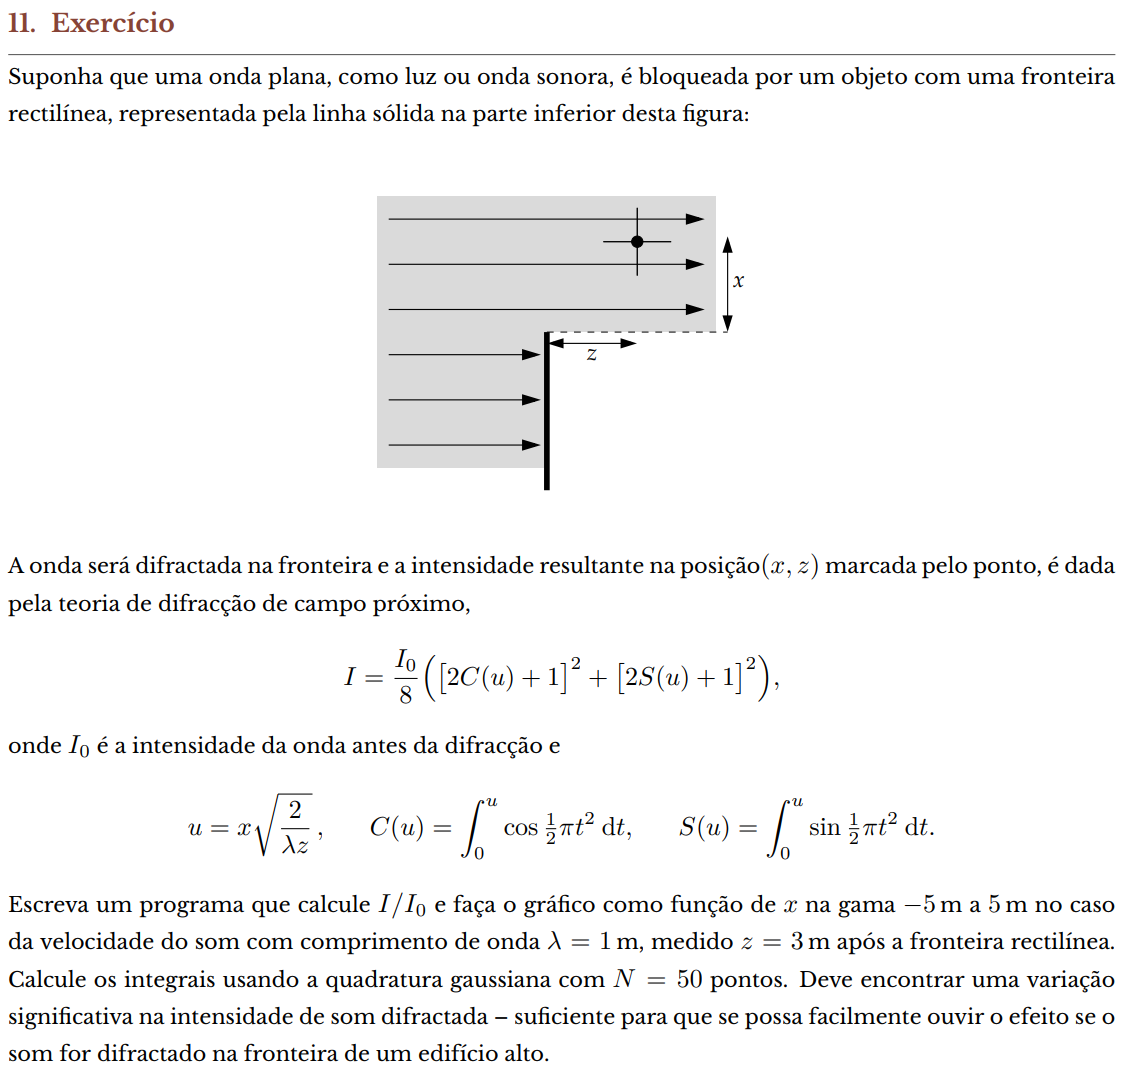

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Callable

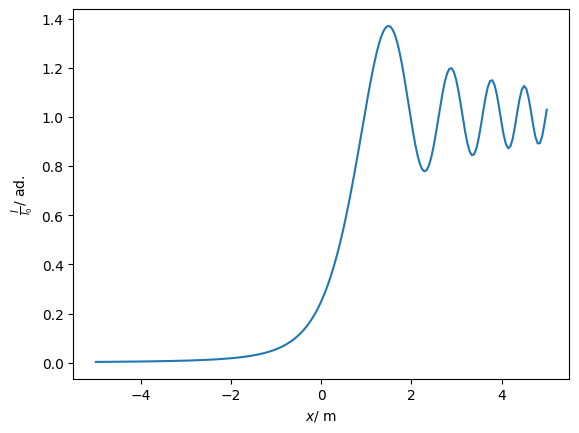

In [5]:
def quadgausseasy(start: float, end: float, func: Callable, n: int) -> float:
    """
        Calcula o integral de `func` de `start` a `end` usando quadratura gaussiana com `n` pontos.

        ### Retorno
        Devolve o valor do integral.
    """

    # Determinar zeros e pesos
    xx, ww = np.polynomial.legendre.leggauss(n)

    # Fazer com que o integral seja de -1 a 1
    def f(x: float) -> float:
        return func((x + 1) * (end - start) / 2 + start)
    
    return  ((end - start) / 2) * np.sum(f(xx) * ww)



def intensidade(x: float, z: float, lamb=1, N=50):
    """
        Calcula a intensidade I/I0 no ponto (x, z) indicado na imagem do enunciado resolvendo os integrais com quadratura gaussiana com 50 pontos.
    """

    u = x * (2 / (lamb * z)) ** 0.5
    C = quadgausseasy(0, u, lambda t: np.cos(np.pi * t**2 / 2), N)
    S = quadgausseasy(0, u, lambda t: np.sin(np.pi * t**2 / 2), N)

    return ((2 * C + 1)**2 + (2 * S + 1)**2) / 8


# Calcular as intensidades
xx = np.linspace(-5, 5, 200)
ii = [intensidade(x, 3) for x in xx]


# Fazer o gráfico
plt.plot(xx, ii)
plt.xlabel("$x$/ m")
plt.ylabel("$\\frac{I}{I_0}$/ ad.")
plt.show()